In [5]:
import numpy as np
import pandas as pd

df = pd.read_csv('sms_spam.csv', encoding='ISO-8859-1')
df.columns



Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset shape: (5572, 2)

First 5 rows:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Label distribution:
label
ham     4825
spam     747
Name: count, dtype: int64


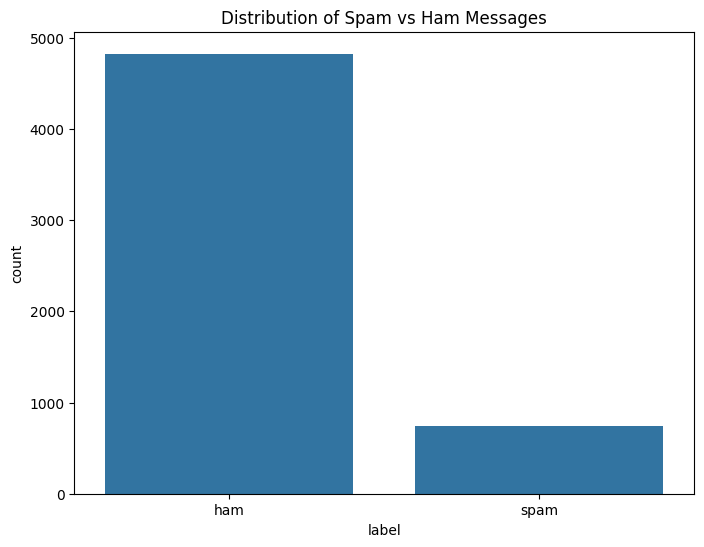

In [6]:
# data exploration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import nltk
import warnings
warnings.filterwarnings('ignore')

# Download NLTK stopwords (run once)
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('sms_spam.csv', encoding='ISO-8859-1')

# Clean up the columns
df = df[['v1', 'v2']]  # We only need these two columns
df.columns = ['label', 'message']  # Rename columns for clarity

# Explore the data
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nLabel distribution:")
print(df['label'].value_counts())

# Visualize the label distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution of Spam vs Ham Messages')
plt.savefig('label_distribution.png')
plt.show()

In [7]:
# data preprocessing

# Text preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])

    # Tokenize
    words = text.split()

    # Remove stopwords and apply stemming
    stop_words = set(stopwords.words('english'))
    porter = PorterStemmer()
    words = [porter.stem(word) for word in words if word not in stop_words]

    return ' '.join(words)

# Apply preprocessing
df['processed_text'] = df['message'].apply(preprocess_text)

# Encode labels (spam=1, ham=0)
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'],
    df['label'],
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [8]:
#feature extraction

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Count Vectorizer (for comparison)
count_vec = CountVectorizer(max_features=5000)
X_train_count = count_vec.fit_transform(X_train)
X_test_count = count_vec.transform(X_test)

=== Evaluating Models with TF-IDF Features ===

--- Naive Bayes ---
Accuracy: 0.9668
ROC AUC: 0.9797

Confusion Matrix:
[[965   1]
 [ 36 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



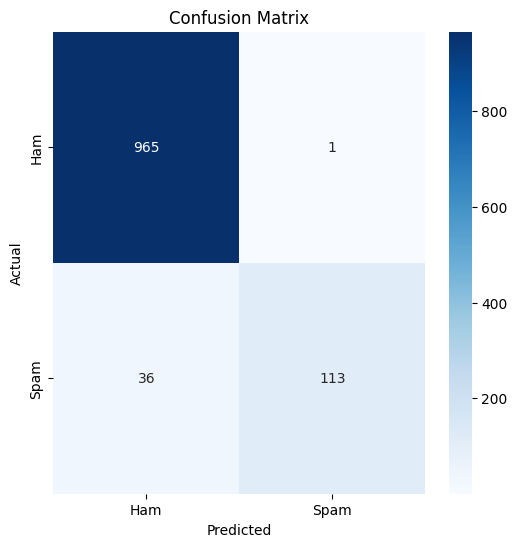


--- Logistic Regression ---
Accuracy: 0.9659
ROC AUC: 0.9821

Confusion Matrix:
[[964   2]
 [ 36 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.98      0.76      0.86       149

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



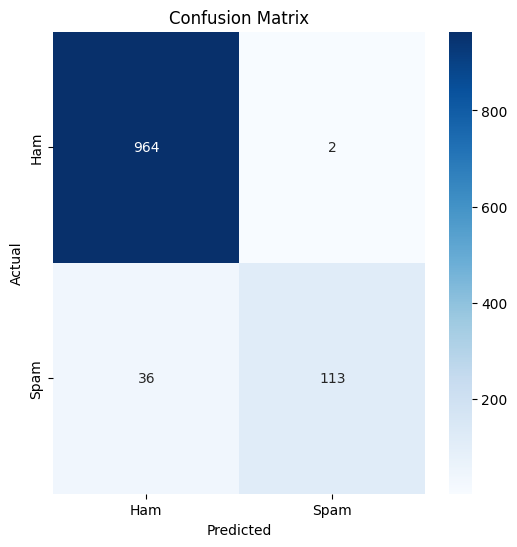


--- SVM ---
Accuracy: 0.9865
ROC AUC: 0.9853

Confusion Matrix:
[[965   1]
 [ 14 135]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       0.99      0.91      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



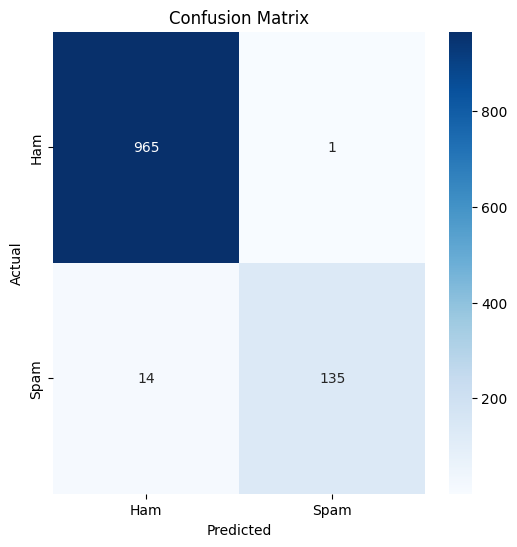


=== Evaluating Models with Count Features ===

--- Naive Bayes ---
Accuracy: 0.9803
ROC AUC: 0.9777

Confusion Matrix:
[[960   6]
 [ 16 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



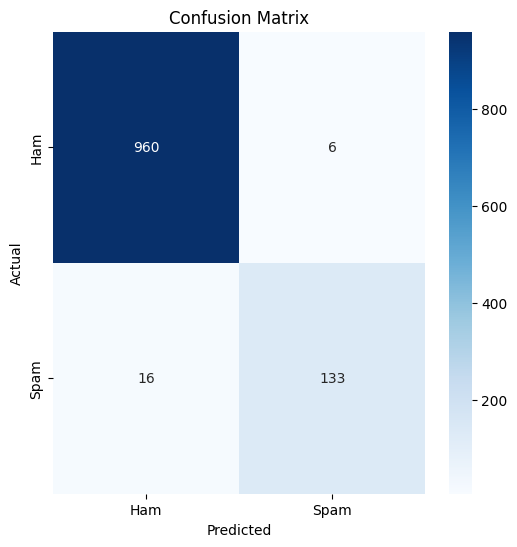


--- Logistic Regression ---
Accuracy: 0.9830
ROC AUC: 0.9817

Confusion Matrix:
[[966   0]
 [ 19 130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



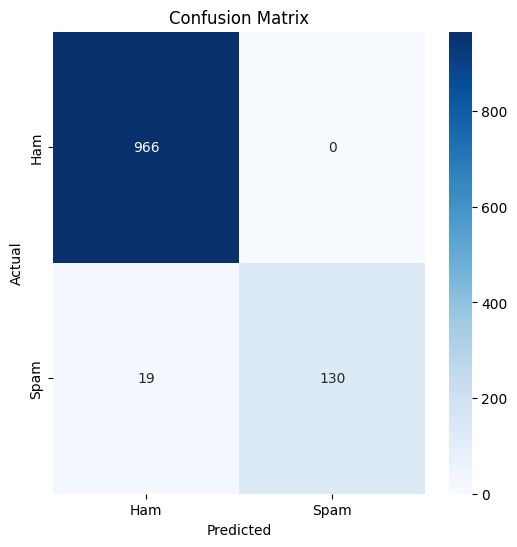


--- SVM ---
Accuracy: 0.9848
ROC AUC: 0.9799

Confusion Matrix:
[[965   1]
 [ 16 133]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



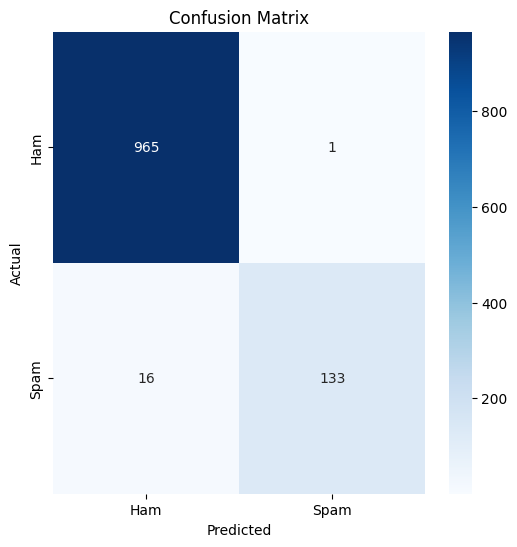

In [9]:
# model building and evaluation
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    # Print results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    return model

# Initialize models
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='linear', probability=True, random_state=42)
}

# Evaluate models with TF-IDF features
print("=== Evaluating Models with TF-IDF Features ===")
for name, model in models.items():
    print(f"\n--- {name} ---")
    evaluate_model(model, X_train_tfidf, X_test_tfidf, y_train, y_test)

# Evaluate models with Count features
print("\n=== Evaluating Models with Count Features ===")
for name, model in models.items():
    print(f"\n--- {name} ---")
    evaluate_model(model, X_train_count, X_test_count, y_train, y_test)

In [10]:
# hyperparameter tuning

# Let's tune the best performing model (usually Logistic Regression)
print("\n=== Hyperparameter Tuning for Logistic Regression ===")

# Create pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Define parameter grid
param_grid = {
    'tfidf__max_features': [1000, 3000, 5000],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # unigrams or bigrams
    'clf__C': [0.1, 1, 10],  # regularization strength
    'clf__penalty': ['l1', 'l2']
}

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(df['processed_text'], df['label'])

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best ROC AUC score:", grid_search.best_score_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

print("\nBest model performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


=== Hyperparameter Tuning for Logistic Regression ===
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'clf__C': 10, 'clf__penalty': 'l2', 'tfidf__max_features': 5000, 'tfidf__ngram_range': (1, 2)}
Best ROC AUC score: 0.9875329508177717

Best model performance:
Accuracy: 0.9964
ROC AUC: 0.9989

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       966
           1       1.00      0.97      0.99       149

    accuracy                           1.00      1115
   macro avg       1.00      0.99      0.99      1115
weighted avg       1.00      1.00      1.00      1115



In [11]:
# model prediction

# Train final model with best parameters
final_model = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features=3000,
        ngram_range=(1, 2)
    )),
    ('clf', LogisticRegression(
        C=1,
        penalty='l2',
        max_iter=1000,
        random_state=42
    ))
])

final_model.fit(df['processed_text'], df['label'])

# Prediction function
def predict_spam(message, model=final_model):
    """
    Predict whether a message is spam or not.

    Args:
        message (str): The SMS message to classify
        model: The trained model to use for prediction

    Returns:
        dict: Prediction results including label and probabilities
    """
    # Preprocess the message
    processed_msg = preprocess_text(message)

    # Make prediction
    prediction = model.predict([processed_msg])[0]
    proba = model.predict_proba([processed_msg])[0]

    # Return results
    return {
        'message': message,
        'prediction': 'spam' if prediction == 1 else 'ham',
        'spam_probability': proba[1],
        'ham_probability': proba[0]
    }

# Test the prediction function
test_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT: Your bank account has been compromised. Click this link to secure it now!",
    "Your package will be delivered tomorrow at 2pm",
    "You've been selected for our exclusive offer! Call now to claim your prize!"
]

print("\n=== Testing Prediction Function ===")
for msg in test_messages:
    result = predict_spam(msg)
    print(f"\nMessage: {result['message']}")
    print(f"Prediction: {result['prediction']}")
    print(f"Spam Probability: {result['spam_probability']:.4f}")


=== Testing Prediction Function ===

Message: Congratulations! You've won a $1000 Walmart gift card. Click here to claim now!
Prediction: ham
Spam Probability: 0.4971

Message: Hey, are we still meeting for lunch tomorrow?
Prediction: ham
Spam Probability: 0.0137

Message: URGENT: Your bank account has been compromised. Click this link to secure it now!
Prediction: ham
Spam Probability: 0.3295

Message: Your package will be delivered tomorrow at 2pm
Prediction: ham
Spam Probability: 0.0663

Message: You've been selected for our exclusive offer! Call now to claim your prize!
Prediction: spam
Spam Probability: 0.8817


In [12]:
# saving the model

import joblib

# Save the model
joblib.dump(final_model, 'spam_detection_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Later you can load them with:
# model = joblib.load('spam_detection_model.pkl')
# vectorizer = joblib.load('tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']